Q1: Use decision trees to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"




Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [2]:
import pandas as pd
import numpy as np

In [3]:
fraud = pd.read_csv('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [11]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
fraud.shape

(600, 6)

In [6]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraud.loc[fraud['Taxable.Income']<=30000,'Taxable_Income']='Risky'
fraud.loc[fraud['Taxable.Income']>30000,'Taxable_Income']='Good'

In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [10]:
fraud.drop('Taxable.Income',axis = 1,inplace=True)

In [11]:
fraud.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

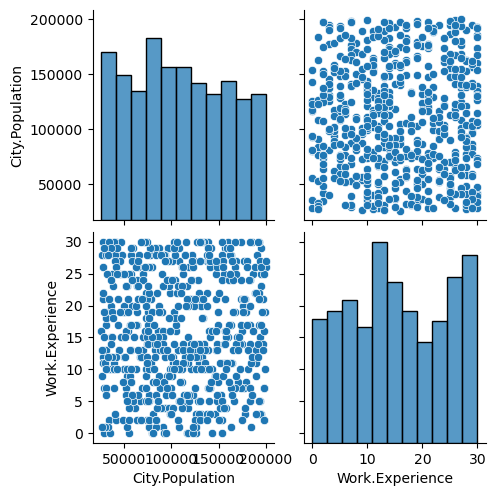

In [13]:
sns.pairplot(fraud)

In [14]:
fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [16]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

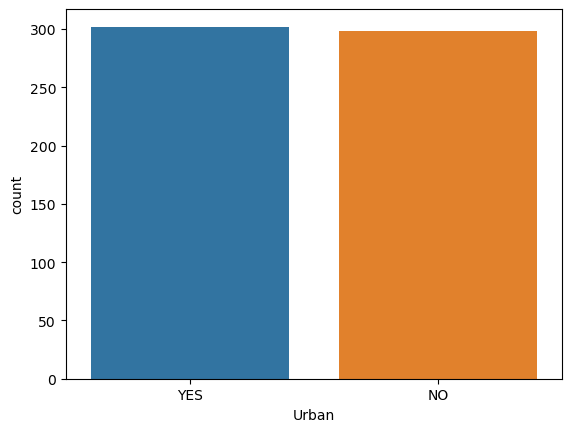

In [17]:
sns.countplot(x='Urban',data = fraud)
plt.show()

In [18]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

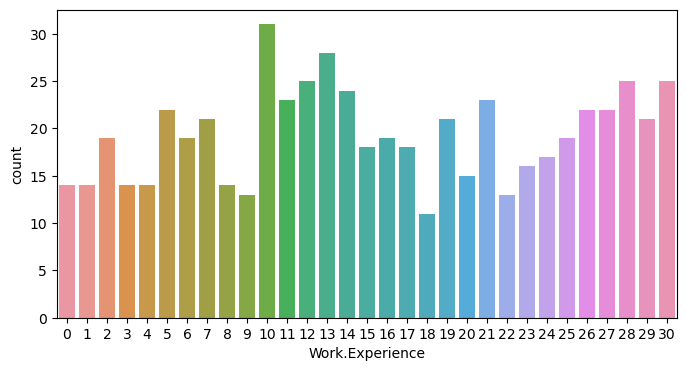

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x='Work.Experience',data=fraud)
plt.show()

In [20]:
fraud['Work.Experience'].value_counts()

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
fraud['Marital.Status'] = le.fit_transform(fraud['Marital.Status'])
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,2,50047,10,YES,Good
1,YES,0,134075,18,YES,Good
2,NO,1,160205,30,YES,Good
3,YES,2,193264,15,YES,Good
4,NO,1,27533,28,NO,Good


In [24]:
fraud.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [25]:
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,YES,Good
1,1,0,134075,18,YES,Good
2,0,1,160205,30,YES,Good
3,1,2,193264,15,YES,Good
4,0,1,27533,28,NO,Good


In [26]:
fraud['Urban'] = le.fit_transform(fraud['Urban'])
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [27]:
x = fraud.drop('Taxable_Income',axis = 1)
y = fraud[['Taxable_Income']]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=12)

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

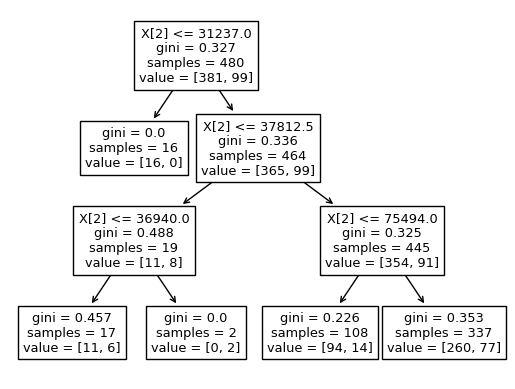

In [32]:
tree.plot_tree(model_dt)
plt.show()

In [33]:
fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['Risky','Good']

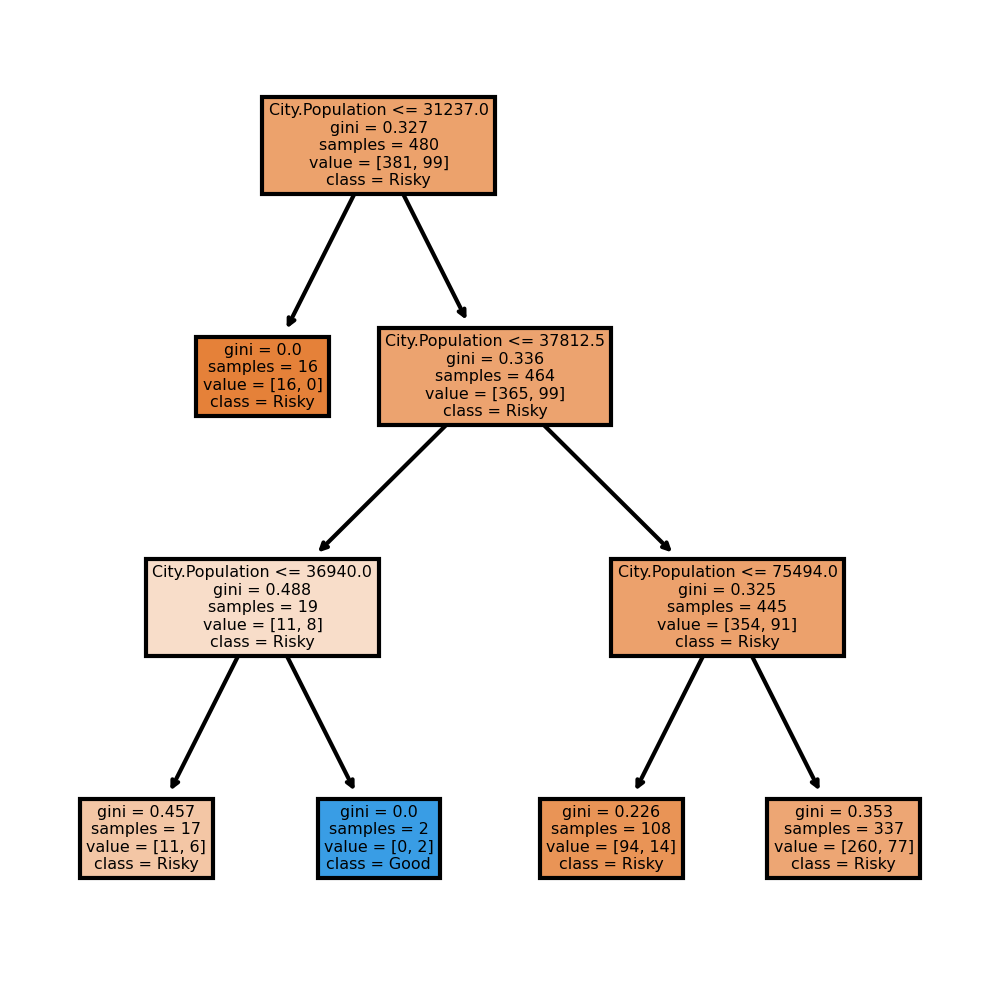

In [34]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model_dt,feature_names=fn,class_names=cn,filled=True);

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
pred = model_dt.predict(x_train)
pd.Series(pred).value_counts()

Good     478
Risky      2
dtype: int64

In [36]:
accuracy_score(y_train,pred)

0.7979166666666667

In [37]:
pd.crosstab(y_train['Taxable_Income'],pred)

col_0,Good,Risky
Taxable_Income,,
Good,381,0
Risky,97,2


In [38]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

        Good       0.80      1.00      0.89       381
       Risky       1.00      0.02      0.04        99

    accuracy                           0.80       480
   macro avg       0.90      0.51      0.46       480
weighted avg       0.84      0.80      0.71       480



In [39]:
pred = model_dt.predict(x_test)
pd.Series(pred).value_counts()

Good    120
dtype: int64

In [40]:
accuracy_score(y_test,pred)

0.7916666666666666

In [42]:
pd.crosstab(y_test['Taxable_Income'],pred)

col_0,Good
Taxable_Income,
Good,95
Risky,25


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Good       0.79      1.00      0.88        95
       Risky       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/Users/nihadnazar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nihadnazar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nihadnazar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
